# Q1

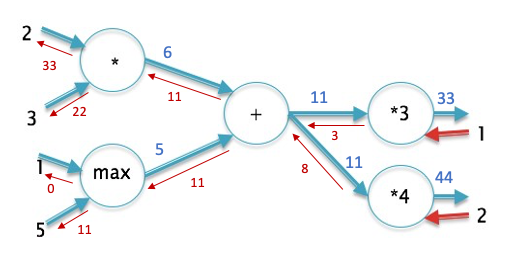

In [27]:
from IPython.display import Image
Image(filename='no1ans.png')

# Q2

## a)

#### Input: 10 nodes

#### Hidden Layer: 50 nodes

#### Output: 3 nodes

#### From Input to Hidden Layer:
Number of Nodes = 10*50 = 500
Number of bias = 50
#### From Hidden Layer to Output:
Number of Nodes = 50*3 = 150
Number of bias = 3

### Total Parameters = 500+50+150+3 = 703

## b) Forward Pass

In [28]:
import numpy as np
import math

x = [0.5, 0.6, 0.1, 0.25, 0.33, 0.9, 0.88, 0.76, 0.69, 0.95]
x = np.array(x).reshape(10,1)
np.random.seed(2)
w1 = np.random.uniform(0,0.1,(50,10))
np.random.seed(2)
b1 = np.random.uniform(0,0.1,50)
np.random.seed(2)
w2 = np.random.uniform(0,0.1,(3,50))
np.random.seed(2)
b2 = np.random.uniform(0,0.1,3)

In [29]:
#relu - hidden layer
def relu(activation):
    return np.maximum(activation,0)

#softmax - output layer
def softmax(X):
    exps = np.exp(X)
    return exps / np.sum(exps)

#preactivation = sum(w*X)+bias
def forward_pass(x,w1,b1,w2,b2):
    a1 = np.dot(w1,x)+b1.reshape(50,1)
    z1 = relu(a1)
    
    a2 = np.dot(w2,z1)+b2.reshape(3,1)
    output = softmax(a2)
    
    return output

In [30]:
output = forward_pass(x,w1,b1,w2,b2)
output

array([[0.33470729],
       [0.31922753],
       [0.34606518]])

## c) Cross Entropy

In [31]:
def cross_entropy(yhat, y):
    N = yhat.shape[0]
    loss = -np.sum(y * np.log(yhat))
    return loss

In [32]:
t = [1,0,0]
t = np.array(t).reshape(3,1)

cross_entropy(output,t)

1.0944988831582187

In [33]:
math.log(3)

1.0986122886681098

### The results of cross entropy loss funcion and log  are very close. 
Cross-entropy is widely used as a loss function when optimizing classification models.

It can be calculated using the probabilities of the events from P and Q, as follows:

H(P, Q) = – sum x in X P(x) * log(Q(x))
Where P(x) is the probability of the event x in P, Q(x) is the probability of event x in Q and log is the base-2 logarithm, meaning that the results are in bits

In the language of classification, these are the actual and the predicted probabilities, or y and yhat.

Expected Probability (y): The known probability of each class label for an example in the dataset (P).
Predicted Probability (yhat): The probability of each class label an example predicted by the model (Q).
We can, therefore, estimate the cross-entropy for a single prediction using the cross-entropy calculation described above; for example.

H(P, Q) = – sum x in X P(y) * log(Q(yhat))

In the given Q.2 (a) classification problem has three classes, and an example has a label for the first class, then the probability distribution will be [1, 0, 0]

We calculate the loss for each class separately and then summing them. By using the above cross entropy formula when known probability of class label is 0 loss is also 0

Cross_Entropy=-(1*log(0.334)+0*log(0.319)+0*log(0.346))
             =-(log(0.334)+0+0
             =1.904
Therefore Cross_Entropy= 1.094 ~ log(3)

### Reason:

That means, the loss would be same no matter whatever the predictions are.

This is a key feature of multiclass logloss, it rewards/penalises probabilities of correct classes only. The value is independent of how the remaining probability is split between incorrect classes.


Referred Links:-
#https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451
#https://machinelearningmastery.com/cross-entropy-for-machine-learning/
#https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation

## d) Backward Pass

In [34]:
learning_rate = 0.01

In [35]:
def backpass(x,w1,w2,b1,b2,t):
    
    a1 = np.dot(w1,x)+b1.reshape(50,1)
    z1 = relu(a1)
    a2 = np.dot(w2,z1)+b2.reshape(3,1)
    output = softmax(a2)
    
    #compute Delta
    delta_2 = output-t
    delta_1 = np.dot(w2.T, delta_2)
    
    #dL/dw = delta*Z
    w2_grad = np.dot(delta_2, z1.T)
    b2_grad = np.sum(delta_2,axis=1,keepdims=True)
    w1_grad = np.dot(delta_1, x.T)
    b1_grad = np.sum(delta_1, axis=1, keepdims=True)
    
    #update the weight by applying learning rate small steps
    w2 -= learning_rate * w2_grad
    b2 = b2.reshape(3,1) - learning_rate * b2_grad
    w1 -= learning_rate * w1_grad
    b1 = b1.reshape(50,1) - learning_rate * b1_grad
    
    return w2, b2, w1, b1

In [36]:
print('Updated w2 is: \n',backpass(x,w1,w2,b1,b2,t)[0])

Updated w2 is: 
 [[ 4.51831211e-02  4.82162426e-03  5.64644547e-02  4.57988294e-02
   4.48304090e-02  3.49867486e-02  2.25267630e-02  6.41062350e-02
   3.18368257e-02  2.87831675e-02  6.46062157e-02  5.54999494e-02
   1.48228787e-02  5.35025027e-02  2.05272894e-02  7.99272338e-02
   8.80686134e-02  5.23677939e-02  8.69555461e-02  1.04340009e-02
   5.35017146e-02  9.25287497e-03  4.49377616e-02  1.22988666e-02
   1.51436598e-02  6.12990351e-02  2.51471850e-02  1.34166523e-02
   2.41128462e-02  3.72451739e-02  4.88797630e-02  2.25707816e-02
   6.53929061e-02  5.01151152e-02  5.28183307e-02  4.09752319e-02
   8.18179383e-02  6.00903864e-02  1.79419324e-02  7.19700964e-02
   9.95106772e-02  5.23165576e-02  9.19651653e-02  3.66265596e-02
   5.90911295e-02  4.50030930e-02  4.60674237e-02  8.09546246e-02
   5.63028671e-02  9.77040256e-02]
 [ 5.36609421e-02  7.13995021e-03  3.59153553e-02  8.39974720e-02
   3.92870369e-02  1.78300037e-03  2.37283622e-02  5.66882068e-03
   9.84872669e-02  9.605

In [37]:
print('Updated b2 is: \n',backpass(x,w1,w2,b1,b2,t)[1])

Updated b2 is: 
 [[ 0.05011392]
 [-0.00053551]
 [ 0.05157995]]


In [38]:
print('Updated w1 is: \n',backpass(x,w1,w2,b1,b2,t)[2])

Updated w1 is: 
 [[0.0433977  0.00235048 0.05492589 0.04343135 0.0419036  0.03267026
  0.02010972 0.06162038 0.029687   0.02629933]
 [0.06206415 0.05285513 0.01344815 0.0513332  0.01841149 0.0784449
  0.08531088 0.04934885 0.08458821 0.00787101]
 [0.05046996 0.00646307 0.0428013  0.00962577 0.01267993 0.05957616
  0.02250502 0.0106115  0.02195521 0.0348788 ]
 [0.04645706 0.0197883  0.06397634 0.04814614 0.05031136 0.03811023
  0.07879758 0.05751146 0.01578593 0.06946403]
 [0.09630969 0.04982634 0.08892292 0.03408866 0.05661844 0.04249285
  0.0434188  0.07743489 0.05335975 0.09509794]
 [0.0544829  0.00828399 0.03664666 0.08511609 0.04066848 0.00283198
  0.02482699 0.0068088  0.09947087 0.09717599]
 [0.08002726 0.06018342 0.07649627 0.01692326 0.02930326 0.05240925
  0.03566493 0.00457006 0.09831731 0.0441382 ]
 [0.05053843 0.0325202  0.02600215 0.03875818 0.08329303 0.07392381
  0.03816462 0.00151209 0.07993147 0.02720182]
 [0.05782104 0.00201816 0.06613071 0.03852862 0.04941206 0.04068

In [39]:
print('Updated b1 is: \n',backpass(x,w1,w2,b1,b2,t)[3])

Updated b1 is: 
 [[0.0434997 ]
 [0.00260205]
 [0.05495901]
 [0.04336823]
 [0.04199526]
 [0.03310917]
 [0.02050356]
 [0.06205582]
 [0.02971374]
 [0.02650348]
 [0.06224401]
 [0.05283879]
 [0.01321385]
 [0.05151156]
 [0.01833125]
 [0.07863703]
 [0.085695  ]
 [0.04974226]
 [0.08476114]
 [0.0077911 ]
 [0.05059304]
 [0.00632047]
 [0.04298034]
 [0.00960949]
 [0.01257653]
 [0.05978178]
 [0.02269517]
 [0.0106283 ]
 [0.02189037]
 [0.0351217 ]
 [0.04692279]
 [0.02026655]
 [0.06420924]
 [0.04844941]
 [0.0506002 ]
 [0.03869103]
 [0.07954749]
 [0.0579342 ]
 [0.01607035]
 [0.07045578]
 [0.09683882]
 [0.05031183]
 [0.08908654]
 [0.03417459]
 [0.05682902]
 [0.0427466 ]
 [0.04356098]
 [0.07802279]
 [0.05384467]
 [0.0955407 ]]


## e) Stochastic Gradient Descent

In [40]:
def stoch(x,w1,w2,b1,b2,t,n_iter,learning_rate):
    total_loss = []
    
    #connect forward_pass(), backpass(), cross_entropy() together
    #to get updated weights through each iteration
    for i in range(n_iter):

        output = forward_pass(x,w1,b1,w2,b2)
                                      
        w2 = backpass(x,w1,w2,b1,b2,t)[0]
        b2 = backpass(x,w1,w2,b1,b2,t)[1]
        w1 = backpass(x,w1,w2,b1,b2,t)[2]
        b1 = backpass(x,w1,w2,b1,b2,t)[3]
        
        loss = cross_entropy(output,t)
        total_loss.append(loss)
        
    return total_loss

In [41]:
n_iter = 100
learning_rate = 0.01

stoch(x,w1,w2,b1,b2,t,n_iter,learning_rate)

[0.9419822630430342,
 0.8076988311076243,
 0.6945130144520044,
 0.5991815752535402,
 0.5189962992878845,
 0.4516209534051215,
 0.39501737722468466,
 0.3474153119388186,
 0.3072958733799203,
 0.27337415585960145,
 0.2445770041853504,
 0.22001709683213033,
 0.19896592076544273,
 0.18082789171281277,
 0.16511702400322553,
 0.15143676668393083,
 0.13946307674587344,
 0.12893048939950388,
 0.11962080519353151,
 0.11135397903714138,
 0.10398081807478395,
 0.09737714255789513,
 0.09143911834724787,
 0.0860795221753634,
 0.08122474721146992,
 0.07681239556753389,
 0.07278933635761047,
 0.0691101335878554,
 0.06573576851291207,
 0.06263259712525639,
 0.059771496014143576,
 0.057127159667326476,
 0.054677519982815684,
 0.052403264780661395,
 0.05028743682652924,
 0.048315098588915015,
 0.046473050874695214,
 0.04474959579728209,
 0.043134336362533214,
 0.04161800641385053,
 0.040192325840343705,
 0.038849876883069415,
 0.03758399812293866,
 0.036388693337825385,
 0.03525855290543645,
 0.03418868

We could see that the loss value is going towards zero after 100 iterations. It's nearly 100% accuracy. This is an overfitting problem since we are training our model only based on the small set of data.

# Q3

Importing keras libraries for generating the models.

In [16]:
import keras
keras.__version__
from keras import models
from keras import layers

Reading from the Fashion dataset and assigning it to training/testing images and training/testing labels.

In [17]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Checking the size and type of the labels and images.

In [18]:
train_images.shape

(60000, 28, 28)

In [19]:
test_images.shape

(10000, 28, 28)

In [20]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## a) A linear model

After checking the sizes of the dataset, the data is then refactored as an appropriately sized arrays of arrays of floats32.

In [21]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

A linnear model is then composed with softmax activation and assigned to "network", then compiled with SGD and Categorical Crossentropy. The model is then trained for 100 epochs achieving ~.85 validation accuracy.

In [22]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 2ms/step - loss: 1.2243 - accuracy: 0.6312 - val_loss: 0.8942 - val_accuracy: 0.7140
Epoch 2/100
375/375 [==============================] - 0s 1ms/step - loss: 0.8224 - accuracy: 0.7358 - val_loss: 0.7575 - val_accuracy: 0.7556
Epoch 3/100
375/375 [==============================] - 0s 1ms/step - loss: 0.7289 - accuracy: 0.7656 - val_loss: 0.6959 - val_accuracy: 0.7771
Epoch 4/100
375/375 [==============================] - 0s 1ms/step - loss: 0.6782 - accuracy: 0.7831 - val_loss: 0.6556 - val_accuracy: 0.7880
Epoch 5/100
375/375 [==============================] - 0s 1ms/step - loss: 0.6445 - accuracy: 0.7936 - val_loss: 0.6285 - val_accuracy: 0.7968
Epoch 6/100
375/375 [==============================] - 0s 1ms/step - loss: 0.6199 - accuracy: 0.8012 - val_loss: 0.6087 - val_accuracy: 0.8005
Epoch 7/100
375/375 [==============================] - 1s 1ms/step - loss: 0.6010 - accuracy: 0.8056 - val_loss: 0.5932 - val_accuracy: 0.8030

Epoch 58/100
375/375 [==============================] - 1s 1ms/step - loss: 0.4434 - accuracy: 0.8506 - val_loss: 0.4538 - val_accuracy: 0.8458
Epoch 59/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8503 - val_loss: 0.4532 - val_accuracy: 0.8457
Epoch 60/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.8507 - val_loss: 0.4524 - val_accuracy: 0.8454
Epoch 61/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.8506 - val_loss: 0.4521 - val_accuracy: 0.8462
Epoch 62/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8516 - val_loss: 0.4512 - val_accuracy: 0.8463
Epoch 63/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8512 - val_loss: 0.4514 - val_accuracy: 0.8457
Epoch 64/100
375/375 [==============================] - 0s 1ms/step - loss: 0.4388 - accuracy: 0.8517 - val_loss: 0.4504 - val_accuracy:

## b) Creating a Deep Feed Forward Network

My first try at a DFF network was the default example from the book, but I trained for 1000 epochs to see how the accuracy would improve. The model uses relu activation for the hidden layers.

In [23]:
network = models.Sequential()
network.add(layers.Dense(20, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(15, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=128, validation_split=0.2)

Epoch 1/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.4859 - accuracy: 0.4875 - val_loss: 1.0028 - val_accuracy: 0.6668
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.8637 - accuracy: 0.6917 - val_loss: 0.7633 - val_accuracy: 0.7232
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.7258 - accuracy: 0.7387 - val_loss: 0.6884 - val_accuracy: 0.7534
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.6625 - accuracy: 0.7725 - val_loss: 0.6305 - val_accuracy: 0.7848
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.6177 - accuracy: 0.7948 - val_loss: 0.5936 - val_accuracy: 0.8033
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5813 - accuracy: 0.8075 - val_loss: 0.5670 - val_accuracy: 0.8108
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5523 - accuracy: 0.8164 - val_loss: 0.5505 - val_accuracy:

Epoch 56/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8759 - val_loss: 0.3900 - val_accuracy: 0.8657
Epoch 57/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8770 - val_loss: 0.3943 - val_accuracy: 0.8638
Epoch 58/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8773 - val_loss: 0.3881 - val_accuracy: 0.8649
Epoch 59/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8774 - val_loss: 0.3875 - val_accuracy: 0.8676
Epoch 60/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.3482 - accuracy: 0.8777 - val_loss: 0.3888 - val_accuracy: 0.8665
Epoch 61/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.3463 - accuracy: 0.8783 - val_loss: 0.3849 - val_accuracy: 0.8676
Epoch 62/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8781 - val_loss: 0.3882 - val_ac

375/375 [==============================] - 1s 1ms/step - loss: 0.2813 - accuracy: 0.9009 - val_loss: 0.3745 - val_accuracy: 0.8725
Epoch 169/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2806 - accuracy: 0.9016 - val_loss: 0.3794 - val_accuracy: 0.8684
Epoch 170/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2800 - accuracy: 0.9027 - val_loss: 0.3829 - val_accuracy: 0.8682
Epoch 171/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2796 - accuracy: 0.9011 - val_loss: 0.3755 - val_accuracy: 0.8716
Epoch 172/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2804 - accuracy: 0.9007 - val_loss: 0.3728 - val_accuracy: 0.8712
Epoch 173/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2790 - accuracy: 0.9017 - val_loss: 0.3787 - val_accuracy: 0.8686
Epoch 174/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2779 - accuracy: 0.9020 - val_loss: 0.3727 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.2469 - accuracy: 0.9129 - val_loss: 0.3904 - val_accuracy: 0.8700
Epoch 281/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.9122 - val_loss: 0.3885 - val_accuracy: 0.8715
Epoch 282/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2439 - accuracy: 0.9136 - val_loss: 0.3919 - val_accuracy: 0.8708
Epoch 283/1000
375/375 [==============================] - ETA: 0s - loss: 0.2434 - accuracy: 0.91 - 1s 2ms/step - loss: 0.2443 - accuracy: 0.9131 - val_loss: 0.3916 - val_accuracy: 0.8681
Epoch 284/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2454 - accuracy: 0.9133 - val_loss: 0.3987 - val_accuracy: 0.8644
Epoch 285/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2458 - accuracy: 0.9137 - val_loss: 0.3915 - val_accuracy: 0.8677
Epoch 286/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2447 - accuracy: 

Epoch 336/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.2347 - accuracy: 0.9177 - val_loss: 0.3997 - val_accuracy: 0.8693
Epoch 337/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2329 - accuracy: 0.9173 - val_loss: 0.4003 - val_accuracy: 0.8698
Epoch 338/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2336 - accuracy: 0.9176 - val_loss: 0.4133 - val_accuracy: 0.8661
Epoch 339/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2318 - accuracy: 0.9184 - val_loss: 0.4039 - val_accuracy: 0.8689
Epoch 340/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2335 - accuracy: 0.9177 - val_loss: 0.4072 - val_accuracy: 0.8688
Epoch 341/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9182 - val_loss: 0.4057 - val_accuracy: 0.8687
Epoch 342/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2331 - accuracy: 0.9173 - val_loss: 0.3968 -

Epoch 392/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9216 - val_loss: 0.4180 - val_accuracy: 0.8671
Epoch 393/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9219 - val_loss: 0.4309 - val_accuracy: 0.8612
Epoch 394/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2229 - accuracy: 0.9206 - val_loss: 0.4133 - val_accuracy: 0.8658
Epoch 395/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9221 - val_loss: 0.4295 - val_accuracy: 0.8604
Epoch 396/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2223 - accuracy: 0.9216 - val_loss: 0.4211 - val_accuracy: 0.8651
Epoch 397/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2225 - accuracy: 0.9202 - val_loss: 0.4207 - val_accuracy: 0.8675
Epoch 398/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2212 - accuracy: 0.9217 - val_loss: 0.4205 -

375/375 [==============================] - 1s 1ms/step - loss: 0.2051 - accuracy: 0.9282 - val_loss: 0.4387 - val_accuracy: 0.8662
Epoch 505/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9277 - val_loss: 0.4406 - val_accuracy: 0.8651
Epoch 506/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2037 - accuracy: 0.9276 - val_loss: 0.4437 - val_accuracy: 0.8624
Epoch 507/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2032 - accuracy: 0.9274 - val_loss: 0.4457 - val_accuracy: 0.8648
Epoch 508/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2021 - accuracy: 0.9285 - val_loss: 0.4488 - val_accuracy: 0.8608
Epoch 509/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2030 - accuracy: 0.9287 - val_loss: 0.4418 - val_accuracy: 0.8656
Epoch 510/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9281 - val_loss: 0.4426 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9334 - val_loss: 0.4758 - val_accuracy: 0.8627
Epoch 617/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1897 - accuracy: 0.9331 - val_loss: 0.4692 - val_accuracy: 0.8622
Epoch 618/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9344 - val_loss: 0.4765 - val_accuracy: 0.8615
Epoch 619/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1876 - accuracy: 0.9337 - val_loss: 0.4870 - val_accuracy: 0.8618
Epoch 620/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1871 - accuracy: 0.9339 - val_loss: 0.4773 - val_accuracy: 0.8619
Epoch 621/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1872 - accuracy: 0.9339 - val_loss: 0.4843 - val_accuracy: 0.8623
Epoch 622/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1869 - accuracy: 0.9342 - val_loss: 0.4731 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.1769 - accuracy: 0.9376 - val_loss: 0.5127 - val_accuracy: 0.8577
Epoch 729/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1754 - accuracy: 0.9384 - val_loss: 0.5203 - val_accuracy: 0.8563
Epoch 730/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9373 - val_loss: 0.5095 - val_accuracy: 0.8597
Epoch 731/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1754 - accuracy: 0.9389 - val_loss: 0.4989 - val_accuracy: 0.8628
Epoch 732/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1754 - accuracy: 0.9389 - val_loss: 0.5044 - val_accuracy: 0.8603
Epoch 733/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1739 - accuracy: 0.9395 - val_loss: 0.5003 - val_accuracy: 0.8618
Epoch 734/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1777 - accuracy: 0.9369 - val_loss: 0.5112 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.1641 - accuracy: 0.9419 - val_loss: 0.5359 - val_accuracy: 0.8567
Epoch 841/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1647 - accuracy: 0.9427 - val_loss: 0.5365 - val_accuracy: 0.8597
Epoch 842/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1672 - accuracy: 0.9413 - val_loss: 0.5389 - val_accuracy: 0.8622
Epoch 843/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1642 - accuracy: 0.9433 - val_loss: 0.5356 - val_accuracy: 0.8585
Epoch 844/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1647 - accuracy: 0.9417 - val_loss: 0.5337 - val_accuracy: 0.8601
Epoch 845/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1666 - accuracy: 0.9413 - val_loss: 0.5441 - val_accuracy: 0.8610
Epoch 846/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1640 - accuracy: 0.9424 - val_loss: 0.5400 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.1565 - accuracy: 0.9455 - val_loss: 0.5726 - val_accuracy: 0.8574
Epoch 953/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1564 - accuracy: 0.9460 - val_loss: 0.5710 - val_accuracy: 0.8570
Epoch 954/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1573 - accuracy: 0.9440 - val_loss: 0.5701 - val_accuracy: 0.8556
Epoch 955/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9449 - val_loss: 0.5695 - val_accuracy: 0.8557
Epoch 956/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1569 - accuracy: 0.9453 - val_loss: 0.5812 - val_accuracy: 0.8552
Epoch 957/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1569 - accuracy: 0.9455 - val_loss: 0.5771 - val_accuracy: 0.8563
Epoch 958/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1557 - accuracy: 0.9461 - val_loss: 0.5733 - val_accuracy: 

Seeing as the model was still training very fast, I increased the number and sizes of layers. Seeing marginal improviments in accuracy.

In [24]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=128, validation_split=0.2)

Epoch 1/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.6508 - accuracy: 0.4770 - val_loss: 0.9522 - val_accuracy: 0.7056
Epoch 2/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.7764 - accuracy: 0.7410 - val_loss: 0.6588 - val_accuracy: 0.7772
Epoch 3/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.6258 - accuracy: 0.7820 - val_loss: 0.5883 - val_accuracy: 0.7928
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5746 - accuracy: 0.7980 - val_loss: 0.5756 - val_accuracy: 0.7884
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5395 - accuracy: 0.8119 - val_loss: 0.5286 - val_accuracy: 0.8166
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5202 - accuracy: 0.8179 - val_loss: 0.5075 - val_accuracy: 0.8201
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5011 - accuracy: 0.8262 - val_loss: 0.4947 - val_accuracy:

375/375 [==============================] - 1s 1ms/step - loss: 0.2571 - accuracy: 0.9077 - val_loss: 0.3633 - val_accuracy: 0.8752
Epoch 114/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2568 - accuracy: 0.9066 - val_loss: 0.3571 - val_accuracy: 0.8744
Epoch 115/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2551 - accuracy: 0.9082 - val_loss: 0.3611 - val_accuracy: 0.8757
Epoch 116/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2535 - accuracy: 0.9071 - val_loss: 0.3751 - val_accuracy: 0.8675
Epoch 117/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2544 - accuracy: 0.9079 - val_loss: 0.3619 - val_accuracy: 0.8736
Epoch 118/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2538 - accuracy: 0.9084 - val_loss: 0.3542 - val_accuracy: 0.8769
Epoch 119/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.2530 - accuracy: 0.9080 - val_loss: 0.3537 - val_accuracy: 

Epoch 225/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1940 - accuracy: 0.9309 - val_loss: 0.3886 - val_accuracy: 0.8781
Epoch 226/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1932 - accuracy: 0.9306 - val_loss: 0.3904 - val_accuracy: 0.8763
Epoch 227/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1937 - accuracy: 0.9300 - val_loss: 0.4292 - val_accuracy: 0.8666
Epoch 228/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1933 - accuracy: 0.9305 - val_loss: 0.4153 - val_accuracy: 0.8705
Epoch 229/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1935 - accuracy: 0.9309 - val_loss: 0.4023 - val_accuracy: 0.8758
Epoch 230/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1913 - accuracy: 0.9309 - val_loss: 0.4041 - val_accuracy: 0.8748
Epoch 231/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1915 - accuracy: 0.9315 - val_loss: 0.4030 -

375/375 [==============================] - 1s 1ms/step - loss: 0.1552 - accuracy: 0.9446 - val_loss: 0.4875 - val_accuracy: 0.8643
Epoch 338/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1539 - accuracy: 0.9445 - val_loss: 0.4612 - val_accuracy: 0.8723
Epoch 339/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1563 - accuracy: 0.9444 - val_loss: 0.4782 - val_accuracy: 0.8709
Epoch 340/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1569 - accuracy: 0.9432 - val_loss: 0.4639 - val_accuracy: 0.8729
Epoch 341/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1538 - accuracy: 0.9448 - val_loss: 0.5141 - val_accuracy: 0.8590
Epoch 342/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1538 - accuracy: 0.9441 - val_loss: 0.4556 - val_accuracy: 0.8730
Epoch 343/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1565 - accuracy: 0.9439 - val_loss: 0.4647 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.1282 - accuracy: 0.9532 - val_loss: 0.5319 - val_accuracy: 0.8711
Epoch 450/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1275 - accuracy: 0.9548 - val_loss: 0.5362 - val_accuracy: 0.8687
Epoch 451/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1279 - accuracy: 0.9554 - val_loss: 0.5516 - val_accuracy: 0.8637
Epoch 452/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1279 - accuracy: 0.9544 - val_loss: 0.5602 - val_accuracy: 0.8633
Epoch 453/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1262 - accuracy: 0.9556 - val_loss: 0.5442 - val_accuracy: 0.8688
Epoch 454/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1275 - accuracy: 0.9549 - val_loss: 0.5683 - val_accuracy: 0.8618
Epoch 455/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1267 - accuracy: 0.9554 - val_loss: 0.5565 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.9614 - val_loss: 0.6316 - val_accuracy: 0.8674
Epoch 562/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1064 - accuracy: 0.9628 - val_loss: 0.6443 - val_accuracy: 0.8622
Epoch 563/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1058 - accuracy: 0.9624 - val_loss: 0.6428 - val_accuracy: 0.8616
Epoch 564/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1099 - accuracy: 0.9612 - val_loss: 0.6314 - val_accuracy: 0.8664
Epoch 565/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1040 - accuracy: 0.9632 - val_loss: 0.6342 - val_accuracy: 0.8643
Epoch 566/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1098 - accuracy: 0.9614 - val_loss: 0.6470 - val_accuracy: 0.8635
Epoch 567/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1071 - accuracy: 0.9619 - val_loss: 0.6443 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.0896 - accuracy: 0.9695 - val_loss: 0.7552 - val_accuracy: 0.8559
Epoch 674/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0894 - accuracy: 0.9686 - val_loss: 0.7306 - val_accuracy: 0.8611
Epoch 675/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0888 - accuracy: 0.9689 - val_loss: 0.7328 - val_accuracy: 0.8636
Epoch 676/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0867 - accuracy: 0.9696 - val_loss: 0.7344 - val_accuracy: 0.8602
Epoch 677/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0909 - accuracy: 0.9681 - val_loss: 0.7288 - val_accuracy: 0.8643
Epoch 678/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0951 - accuracy: 0.9659 - val_loss: 0.7211 - val_accuracy: 0.8641
Epoch 679/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0874 - accuracy: 0.9694 - val_loss: 0.7299 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.0868 - accuracy: 0.9694 - val_loss: 0.8580 - val_accuracy: 0.8543
Epoch 786/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0810 - accuracy: 0.9720 - val_loss: 0.8601 - val_accuracy: 0.8558
Epoch 787/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0763 - accuracy: 0.9740 - val_loss: 0.9312 - val_accuracy: 0.8462
Epoch 788/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0833 - accuracy: 0.9708 - val_loss: 0.8222 - val_accuracy: 0.8625
Epoch 789/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0741 - accuracy: 0.9743 - val_loss: 0.8516 - val_accuracy: 0.8591
Epoch 790/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0768 - accuracy: 0.9729 - val_loss: 0.8479 - val_accuracy: 0.8614
Epoch 791/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0735 - accuracy: 0.9746 - val_loss: 0.8482 - val_accuracy: 

375/375 [==============================] - 1s 1ms/step - loss: 0.0673 - accuracy: 0.9761 - val_loss: 0.9320 - val_accuracy: 0.8573
Epoch 898/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0694 - accuracy: 0.9761 - val_loss: 0.9215 - val_accuracy: 0.8642
Epoch 899/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0650 - accuracy: 0.9781 - val_loss: 0.9280 - val_accuracy: 0.8609
Epoch 900/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0663 - accuracy: 0.9772 - val_loss: 0.9062 - val_accuracy: 0.8611
Epoch 901/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0609 - accuracy: 0.9787 - val_loss: 0.9146 - val_accuracy: 0.8627
Epoch 902/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9764 - val_loss: 0.9438 - val_accuracy: 0.8593
Epoch 903/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9748 - val_loss: 0.9565 - val_accuracy: 

My next try was simply adding one more layer. It improved the accuracy very slightly.

In [25]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=128, validation_split=0.2)

Epoch 1/1000
375/375 [==============================] - 1s 2ms/step - loss: 1.4453 - accuracy: 0.4858 - val_loss: 0.9220 - val_accuracy: 0.6672
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.8131 - accuracy: 0.6978 - val_loss: 0.7720 - val_accuracy: 0.7105
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.6790 - accuracy: 0.7570 - val_loss: 0.6252 - val_accuracy: 0.7790
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.6123 - accuracy: 0.7806 - val_loss: 0.5853 - val_accuracy: 0.7946
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5736 - accuracy: 0.7961 - val_loss: 0.5755 - val_accuracy: 0.7968
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5482 - accuracy: 0.8061 - val_loss: 0.5449 - val_accuracy: 0.8097
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.8138 - val_loss: 0.5257 - val_accuracy:

375/375 [==============================] - 1s 2ms/step - loss: 0.2431 - accuracy: 0.9117 - val_loss: 0.3613 - val_accuracy: 0.8772
Epoch 114/1000
375/375 [==============================] - 1504s 4s/step - loss: 0.2414 - accuracy: 0.9115 - val_loss: 0.3687 - val_accuracy: 0.8756
Epoch 115/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.2432 - accuracy: 0.9113 - val_loss: 0.3645 - val_accuracy: 0.8730
Epoch 116/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.2418 - accuracy: 0.9116 - val_loss: 0.3680 - val_accuracy: 0.8737
Epoch 117/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9116 - val_loss: 0.3639 - val_accuracy: 0.8730
Epoch 118/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2403 - accuracy: 0.9127 - val_loss: 0.3615 - val_accuracy: 0.8758
Epoch 119/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.9118 - val_loss: 0.3612 - val_accuracy

375/375 [==============================] - 0s 1ms/step - loss: 0.1831 - accuracy: 0.9326 - val_loss: 0.4209 - val_accuracy: 0.8742
Epoch 226/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1841 - accuracy: 0.9325 - val_loss: 0.4185 - val_accuracy: 0.8744
Epoch 227/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.9346 - val_loss: 0.4252 - val_accuracy: 0.8728
Epoch 228/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9335 - val_loss: 0.4304 - val_accuracy: 0.8692
Epoch 229/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1839 - accuracy: 0.9326 - val_loss: 0.4192 - val_accuracy: 0.8768
Epoch 230/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1810 - accuracy: 0.9340 - val_loss: 0.4241 - val_accuracy: 0.8759
Epoch 231/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1794 - accuracy: 0.9361 - val_loss: 0.4188 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9471 - val_loss: 0.4991 - val_accuracy: 0.8727
Epoch 338/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1442 - accuracy: 0.9469 - val_loss: 0.5399 - val_accuracy: 0.8647
Epoch 339/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1502 - accuracy: 0.9466 - val_loss: 0.5072 - val_accuracy: 0.8739
Epoch 340/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1481 - accuracy: 0.9465 - val_loss: 0.5157 - val_accuracy: 0.8696
Epoch 341/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1467 - accuracy: 0.9469 - val_loss: 0.5273 - val_accuracy: 0.8621
Epoch 342/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1433 - accuracy: 0.9479 - val_loss: 0.5098 - val_accuracy: 0.8736
Epoch 343/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1449 - accuracy: 0.9461 - val_loss: 0.5125 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.1182 - accuracy: 0.9579 - val_loss: 0.6085 - val_accuracy: 0.8698
Epoch 450/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1236 - accuracy: 0.9558 - val_loss: 0.6083 - val_accuracy: 0.8724
Epoch 451/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1239 - accuracy: 0.9556 - val_loss: 0.6194 - val_accuracy: 0.8679
Epoch 452/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1146 - accuracy: 0.9593 - val_loss: 0.6219 - val_accuracy: 0.8673
Epoch 453/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1173 - accuracy: 0.9581 - val_loss: 0.6060 - val_accuracy: 0.8688
Epoch 454/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1180 - accuracy: 0.9577 - val_loss: 0.6460 - val_accuracy: 0.8631
Epoch 455/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1204 - accuracy: 0.9571 - val_loss: 0.6131 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.0973 - accuracy: 0.9646 - val_loss: 0.6969 - val_accuracy: 0.8651
Epoch 562/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0974 - accuracy: 0.9660 - val_loss: 0.6963 - val_accuracy: 0.8663
Epoch 563/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0965 - accuracy: 0.9665 - val_loss: 0.7184 - val_accuracy: 0.8673
Epoch 564/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.1000 - accuracy: 0.9651 - val_loss: 0.7070 - val_accuracy: 0.8628
Epoch 565/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0978 - accuracy: 0.9662 - val_loss: 0.7268 - val_accuracy: 0.8643
Epoch 566/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0955 - accuracy: 0.9661 - val_loss: 0.7353 - val_accuracy: 0.8647
Epoch 567/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0971 - accuracy: 0.9656 - val_loss: 0.7616 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.0858 - accuracy: 0.9694 - val_loss: 0.8266 - val_accuracy: 0.8609
Epoch 674/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0811 - accuracy: 0.9716 - val_loss: 0.8672 - val_accuracy: 0.8577
Epoch 675/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0899 - accuracy: 0.9688 - val_loss: 0.8365 - val_accuracy: 0.8608
Epoch 676/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0804 - accuracy: 0.9718 - val_loss: 0.8410 - val_accuracy: 0.8618
Epoch 677/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 0.9694 - val_loss: 0.8184 - val_accuracy: 0.8632
Epoch 678/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0789 - accuracy: 0.9722 - val_loss: 0.8530 - val_accuracy: 0.8593
Epoch 679/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0814 - accuracy: 0.9723 - val_loss: 0.8276 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9756 - val_loss: 0.9669 - val_accuracy: 0.8590
Epoch 786/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9794 - val_loss: 0.9796 - val_accuracy: 0.8572
Epoch 787/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0661 - accuracy: 0.9773 - val_loss: 0.9746 - val_accuracy: 0.8627
Epoch 788/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0885 - accuracy: 0.9705 - val_loss: 0.9445 - val_accuracy: 0.8616
Epoch 789/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0711 - accuracy: 0.9754 - val_loss: 0.9542 - val_accuracy: 0.8597
Epoch 790/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 0.9764 - val_loss: 0.9611 - val_accuracy: 0.8611
Epoch 791/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0682 - accuracy: 0.9768 - val_loss: 0.9724 - val_accuracy: 

375/375 [==============================] - 0s 1ms/step - loss: 0.0571 - accuracy: 0.9808 - val_loss: 1.0897 - val_accuracy: 0.8579
Epoch 898/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9778 - val_loss: 1.1095 - val_accuracy: 0.8568
Epoch 899/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0528 - accuracy: 0.9824 - val_loss: 1.0807 - val_accuracy: 0.8612
Epoch 900/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.1069 - accuracy: 0.9705 - val_loss: 1.0547 - val_accuracy: 0.8612
Epoch 901/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0576 - accuracy: 0.9801 - val_loss: 1.0639 - val_accuracy: 0.8599
Epoch 902/1000
375/375 [==============================] - 1s 1ms/step - loss: 0.0562 - accuracy: 0.9814 - val_loss: 1.1437 - val_accuracy: 0.8568
Epoch 903/1000
375/375 [==============================] - 0s 1ms/step - loss: 0.0498 - accuracy: 0.9833 - val_loss: 1.0770 - val_accuracy: 

Here I experimented doubling the batch size, it reduced accuracy.

In [26]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=256, validation_split=0.2)

Epoch 1/1000
188/188 [==============================] - 0s 2ms/step - loss: 2.2680 - accuracy: 0.1301 - val_loss: 2.1909 - val_accuracy: 0.2362
Epoch 2/1000
188/188 [==============================] - 0s 2ms/step - loss: 1.9203 - accuracy: 0.3705 - val_loss: 1.5985 - val_accuracy: 0.4610
Epoch 3/1000
188/188 [==============================] - 0s 2ms/step - loss: 1.3296 - accuracy: 0.5468 - val_loss: 1.0765 - val_accuracy: 0.6297
Epoch 4/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.9591 - accuracy: 0.6484 - val_loss: 0.8753 - val_accuracy: 0.6779
Epoch 5/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.8187 - accuracy: 0.6854 - val_loss: 0.7927 - val_accuracy: 0.7080
Epoch 6/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.7486 - accuracy: 0.7194 - val_loss: 0.7262 - val_accuracy: 0.7384
Epoch 7/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.7471 - val_loss: 0.6671 - val_accuracy:

Epoch 56/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8662 - val_loss: 0.4079 - val_accuracy: 0.8577
Epoch 57/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3763 - accuracy: 0.8652 - val_loss: 0.3954 - val_accuracy: 0.8598
Epoch 58/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8668 - val_loss: 0.4011 - val_accuracy: 0.8568
Epoch 59/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8673 - val_loss: 0.3928 - val_accuracy: 0.8615
Epoch 60/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8675 - val_loss: 0.4043 - val_accuracy: 0.8551
Epoch 61/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3673 - accuracy: 0.8677 - val_loss: 0.3953 - val_accuracy: 0.8602
Epoch 62/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.3658 - accuracy: 0.8684 - val_loss: 0.3946 - val_ac

188/188 [==============================] - 0s 2ms/step - loss: 0.2715 - accuracy: 0.9018 - val_loss: 0.3578 - val_accuracy: 0.8753
Epoch 169/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2695 - accuracy: 0.9027 - val_loss: 0.3698 - val_accuracy: 0.8703
Epoch 170/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2688 - accuracy: 0.9020 - val_loss: 0.4075 - val_accuracy: 0.8568
Epoch 171/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.9024 - val_loss: 0.4043 - val_accuracy: 0.8593
Epoch 172/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9021 - val_loss: 0.3566 - val_accuracy: 0.8783
Epoch 173/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.9039 - val_loss: 0.3707 - val_accuracy: 0.8689
Epoch 174/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.9017 - val_loss: 0.3575 - val_accuracy: 

188/188 [==============================] - 0s 2ms/step - loss: 0.2240 - accuracy: 0.9189 - val_loss: 0.4054 - val_accuracy: 0.8670
Epoch 281/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.9190 - val_loss: 0.4274 - val_accuracy: 0.8633
Epoch 282/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9190 - val_loss: 0.3875 - val_accuracy: 0.8742
Epoch 283/1000
188/188 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9207 - val_loss: 0.3752 - val_accuracy: 0.8764
Epoch 284/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.2218 - accuracy: 0.9196 - val_loss: 0.3736 - val_accuracy: 0.8775
Epoch 285/1000
188/188 [==============================] - 1s 4ms/step - loss: 0.2225 - accuracy: 0.9202 - val_loss: 0.4058 - val_accuracy: 0.8690
Epoch 286/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.2219 - accuracy: 0.9202 - val_loss: 0.4166 - val_accuracy: 

188/188 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9305 - val_loss: 0.4078 - val_accuracy: 0.8775
Epoch 393/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9333 - val_loss: 0.4594 - val_accuracy: 0.8659
Epoch 394/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9312 - val_loss: 0.4408 - val_accuracy: 0.8712
Epoch 395/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1922 - accuracy: 0.9301 - val_loss: 0.4549 - val_accuracy: 0.8649
Epoch 396/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1907 - accuracy: 0.9309 - val_loss: 0.4391 - val_accuracy: 0.8667
Epoch 397/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1903 - accuracy: 0.9319 - val_loss: 0.4086 - val_accuracy: 0.8765
Epoch 398/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1881 - accuracy: 0.9320 - val_loss: 0.4223 - val_accuracy: 

188/188 [==============================] - 0s 2ms/step - loss: 0.1677 - accuracy: 0.9403 - val_loss: 0.4725 - val_accuracy: 0.8687
Epoch 505/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.9403 - val_loss: 0.4510 - val_accuracy: 0.8726
Epoch 506/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1825 - accuracy: 0.9382 - val_loss: 0.5572 - val_accuracy: 0.8466
Epoch 507/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9405 - val_loss: 0.4959 - val_accuracy: 0.8662
Epoch 508/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9420 - val_loss: 0.4520 - val_accuracy: 0.8741
Epoch 509/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1609 - accuracy: 0.9429 - val_loss: 0.4698 - val_accuracy: 0.8667
Epoch 510/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.9408 - val_loss: 0.4896 - val_accuracy: 

188/188 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 0.9473 - val_loss: 0.6165 - val_accuracy: 0.8476
Epoch 617/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1469 - accuracy: 0.9478 - val_loss: 0.5172 - val_accuracy: 0.8673
Epoch 618/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9480 - val_loss: 0.5052 - val_accuracy: 0.8708
Epoch 619/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9499 - val_loss: 0.5379 - val_accuracy: 0.8649
Epoch 620/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9501 - val_loss: 0.5228 - val_accuracy: 0.8676
Epoch 621/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.9485 - val_loss: 0.5160 - val_accuracy: 0.8651
Epoch 622/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1460 - accuracy: 0.9486 - val_loss: 0.5264 - val_accuracy: 

188/188 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9551 - val_loss: 0.5753 - val_accuracy: 0.8637
Epoch 729/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1277 - accuracy: 0.9555 - val_loss: 0.5952 - val_accuracy: 0.8594
Epoch 730/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1304 - accuracy: 0.9537 - val_loss: 0.6285 - val_accuracy: 0.8644
Epoch 731/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1255 - accuracy: 0.9549 - val_loss: 0.5763 - val_accuracy: 0.8644
Epoch 732/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9550 - val_loss: 0.6241 - val_accuracy: 0.8594
Epoch 733/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1266 - accuracy: 0.9541 - val_loss: 0.6218 - val_accuracy: 0.8587
Epoch 734/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.1246 - accuracy: 0.9564 - val_loss: 0.5842 - val_accuracy: 

188/188 [==============================] - 1s 3ms/step - loss: 0.1090 - accuracy: 0.9620 - val_loss: 0.6544 - val_accuracy: 0.8556
Epoch 841/1000
188/188 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9586 - val_loss: 0.6341 - val_accuracy: 0.8615
Epoch 842/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.1127 - accuracy: 0.9609 - val_loss: 0.7106 - val_accuracy: 0.8532
Epoch 843/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.1311 - accuracy: 0.9556 - val_loss: 0.6332 - val_accuracy: 0.8622
Epoch 844/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.1070 - accuracy: 0.9631 - val_loss: 0.6651 - val_accuracy: 0.8552
Epoch 845/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.1045 - accuracy: 0.9641 - val_loss: 0.7196 - val_accuracy: 0.8490
Epoch 846/1000
188/188 [==============================] - 1s 4ms/step - loss: 0.1120 - accuracy: 0.9620 - val_loss: 0.6262 - val_accuracy: 

188/188 [==============================] - 1s 3ms/step - loss: 0.0970 - accuracy: 0.9659 - val_loss: 0.7027 - val_accuracy: 0.8568
Epoch 953/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.0986 - accuracy: 0.9656 - val_loss: 0.6982 - val_accuracy: 0.8617
Epoch 954/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.0951 - accuracy: 0.9674 - val_loss: 0.7108 - val_accuracy: 0.8594
Epoch 955/1000
188/188 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9627 - val_loss: 0.7202 - val_accuracy: 0.8638
Epoch 956/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.0919 - accuracy: 0.9683 - val_loss: 0.6977 - val_accuracy: 0.8617
Epoch 957/1000
188/188 [==============================] - 1s 3ms/step - loss: 0.0972 - accuracy: 0.9663 - val_loss: 0.7013 - val_accuracy: 0.8612
Epoch 958/1000
188/188 [==============================] - 1s 4ms/step - loss: 0.1010 - accuracy: 0.9650 - val_loss: 0.7931 - val_accuracy: 

Here I experimented RMSprop. While it trained faster at first, it resulted in a slightly lower accuracy.

In [27]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='RMSprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=128, validation_split=0.2)

Epoch 1/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.7384 - accuracy: 0.7455 - val_loss: 0.5081 - val_accuracy: 0.8216
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.8326 - val_loss: 0.4785 - val_accuracy: 0.8264
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.4218 - accuracy: 0.8481 - val_loss: 0.4204 - val_accuracy: 0.8478
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.8587 - val_loss: 0.3896 - val_accuracy: 0.8608
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.3730 - accuracy: 0.8663 - val_loss: 0.3896 - val_accuracy: 0.8612
Epoch 6/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.3572 - accuracy: 0.8706 - val_loss: 0.3740 - val_accuracy: 0.8678
Epoch 7/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.3436 - accuracy: 0.8754 - val_loss: 0.3594 - val_accuracy:

375/375 [==============================] - 1s 2ms/step - loss: 0.1360 - accuracy: 0.9484 - val_loss: 0.7164 - val_accuracy: 0.8758
Epoch 114/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9480 - val_loss: 0.6610 - val_accuracy: 0.8737
Epoch 115/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1370 - accuracy: 0.9491 - val_loss: 0.6736 - val_accuracy: 0.8767
Epoch 116/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1362 - accuracy: 0.9497 - val_loss: 0.6973 - val_accuracy: 0.8730
Epoch 117/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1355 - accuracy: 0.9492 - val_loss: 0.6831 - val_accuracy: 0.8765
Epoch 118/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.1343 - accuracy: 0.9500 - val_loss: 0.7027 - val_accuracy: 0.8758
Epoch 119/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.1347 - accuracy: 0.9496 - val_loss: 0.7299 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0975 - accuracy: 0.9643 - val_loss: 1.2169 - val_accuracy: 0.8733
Epoch 226/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9644 - val_loss: 1.1441 - val_accuracy: 0.8696
Epoch 227/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0996 - accuracy: 0.9631 - val_loss: 1.2464 - val_accuracy: 0.8694
Epoch 228/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9652 - val_loss: 1.3143 - val_accuracy: 0.8721
Epoch 229/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9634 - val_loss: 1.1679 - val_accuracy: 0.8704
Epoch 230/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0997 - accuracy: 0.9644 - val_loss: 1.2455 - val_accuracy: 0.8717
Epoch 231/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0977 - accuracy: 0.9643 - val_loss: 1.2762 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0801 - accuracy: 0.9711 - val_loss: 1.7954 - val_accuracy: 0.8651
Epoch 338/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0837 - accuracy: 0.9711 - val_loss: 1.7605 - val_accuracy: 0.8664
Epoch 339/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9707 - val_loss: 1.7632 - val_accuracy: 0.8707
Epoch 340/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0846 - accuracy: 0.9702 - val_loss: 1.7766 - val_accuracy: 0.8702
Epoch 341/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9698 - val_loss: 1.8042 - val_accuracy: 0.8692
Epoch 342/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9712 - val_loss: 1.8157 - val_accuracy: 0.8632
Epoch 343/1000
375/375 [==============================] - 1s 3ms/step - loss: 0.0803 - accuracy: 0.9719 - val_loss: 1.7831 - val_accuracy: 

375/375 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9753 - val_loss: 2.4587 - val_accuracy: 0.8644
Epoch 450/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9755 - val_loss: 2.2111 - val_accuracy: 0.8681
Epoch 451/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9757 - val_loss: 2.3739 - val_accuracy: 0.8646
Epoch 452/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9759 - val_loss: 2.2592 - val_accuracy: 0.8658
Epoch 453/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0710 - accuracy: 0.9758 - val_loss: 2.3003 - val_accuracy: 0.8639
Epoch 454/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0726 - accuracy: 0.9754 - val_loss: 2.3707 - val_accuracy: 0.8641
Epoch 455/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9763 - val_loss: 2.5488 - val_accuracy: 

Epoch 561/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0650 - accuracy: 0.9787 - val_loss: 2.9068 - val_accuracy: 0.8651
Epoch 562/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0648 - accuracy: 0.9785 - val_loss: 2.8895 - val_accuracy: 0.8643
Epoch 563/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0686 - accuracy: 0.9781 - val_loss: 2.9869 - val_accuracy: 0.8641
Epoch 564/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9783 - val_loss: 2.9767 - val_accuracy: 0.8660
Epoch 565/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 3.1151 - val_accuracy: 0.8626
Epoch 566/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0661 - accuracy: 0.9783 - val_loss: 2.8944 - val_accuracy: 0.8620
Epoch 567/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0649 - accuracy: 0.9792 - val_loss: 2.9607 -

375/375 [==============================] - 1s 2ms/step - loss: 0.0591 - accuracy: 0.9810 - val_loss: 3.6074 - val_accuracy: 0.8618
Epoch 674/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0628 - accuracy: 0.9809 - val_loss: 3.6733 - val_accuracy: 0.8657
Epoch 675/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9812 - val_loss: 3.5820 - val_accuracy: 0.8601
Epoch 676/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9817 - val_loss: 3.9333 - val_accuracy: 0.8612
Epoch 677/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 3.6103 - val_accuracy: 0.8576
Epoch 678/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0601 - accuracy: 0.9818 - val_loss: 3.8106 - val_accuracy: 0.8602
Epoch 679/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0654 - accuracy: 0.9817 - val_loss: 3.5576 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0586 - accuracy: 0.9832 - val_loss: 4.3296 - val_accuracy: 0.8587
Epoch 786/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 4.4680 - val_accuracy: 0.8565
Epoch 787/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 4.3400 - val_accuracy: 0.8595
Epoch 788/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9831 - val_loss: 4.2007 - val_accuracy: 0.8630
Epoch 789/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0644 - accuracy: 0.9822 - val_loss: 4.1842 - val_accuracy: 0.8562
Epoch 790/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9834 - val_loss: 4.5196 - val_accuracy: 0.8579
Epoch 791/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0583 - accuracy: 0.9829 - val_loss: 4.3959 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0525 - accuracy: 0.9856 - val_loss: 4.8662 - val_accuracy: 0.8588
Epoch 898/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9844 - val_loss: 5.3043 - val_accuracy: 0.8607
Epoch 899/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0578 - accuracy: 0.9845 - val_loss: 5.2400 - val_accuracy: 0.8587
Epoch 900/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 5.0622 - val_accuracy: 0.8577
Epoch 901/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9852 - val_loss: 4.8274 - val_accuracy: 0.8577
Epoch 902/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0519 - accuracy: 0.9849 - val_loss: 5.0343 - val_accuracy: 0.8559
Epoch 903/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0552 - accuracy: 0.9848 - val_loss: 5.1332 - val_accuracy: 

Here I tried to halve the batch size while still using RMSprop, it resulted in a lower accuracy.

In [28]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='RMSprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=64, validation_split=0.2)

Epoch 1/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.6358 - accuracy: 0.7782 - val_loss: 0.4831 - val_accuracy: 0.8262
Epoch 2/1000
750/750 [==============================] - 1s 2ms/step - loss: 0.4400 - accuracy: 0.8428 - val_loss: 0.4245 - val_accuracy: 0.8493
Epoch 3/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.4001 - accuracy: 0.8559 - val_loss: 0.3912 - val_accuracy: 0.8611
Epoch 4/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.3743 - accuracy: 0.8635 - val_loss: 0.3870 - val_accuracy: 0.8571
Epoch 5/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.3547 - accuracy: 0.8701 - val_loss: 0.3722 - val_accuracy: 0.8689
Epoch 6/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.3414 - accuracy: 0.8749 - val_loss: 0.3681 - val_accuracy: 0.8685
Epoch 7/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.8790 - val_loss: 0.3722 - val_accuracy:

750/750 [==============================] - 2s 2ms/step - loss: 0.2044 - accuracy: 0.9301 - val_loss: 0.7492 - val_accuracy: 0.8697
Epoch 114/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.2095 - accuracy: 0.9292 - val_loss: 0.8859 - val_accuracy: 0.8758
Epoch 115/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.2040 - accuracy: 0.9299 - val_loss: 0.8764 - val_accuracy: 0.8752
Epoch 116/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.2047 - accuracy: 0.9298 - val_loss: 0.9493 - val_accuracy: 0.8727
Epoch 117/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.2084 - accuracy: 0.9285 - val_loss: 0.8780 - val_accuracy: 0.8718
Epoch 118/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.2046 - accuracy: 0.9293 - val_loss: 0.8918 - val_accuracy: 0.8731
Epoch 119/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.2000 - accuracy: 0.9301 - val_loss: 0.8586 - val_accuracy: 

750/750 [==============================] - 2s 2ms/step - loss: 0.1916 - accuracy: 0.9389 - val_loss: 1.4337 - val_accuracy: 0.8593
Epoch 226/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1991 - accuracy: 0.9362 - val_loss: 1.5440 - val_accuracy: 0.8731
Epoch 227/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1969 - accuracy: 0.9382 - val_loss: 1.4708 - val_accuracy: 0.8763
Epoch 228/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1937 - accuracy: 0.9382 - val_loss: 1.6400 - val_accuracy: 0.8740
Epoch 229/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1942 - accuracy: 0.9385 - val_loss: 1.5541 - val_accuracy: 0.8663
Epoch 230/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1918 - accuracy: 0.9384 - val_loss: 1.6854 - val_accuracy: 0.8563
Epoch 231/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1932 - accuracy: 0.9377 - val_loss: 1.5123 - val_accuracy: 

750/750 [==============================] - 2s 2ms/step - loss: 0.1843 - accuracy: 0.9442 - val_loss: 2.4153 - val_accuracy: 0.8661
Epoch 338/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1792 - accuracy: 0.9426 - val_loss: 2.3009 - val_accuracy: 0.8668
Epoch 339/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1913 - accuracy: 0.9434 - val_loss: 2.6539 - val_accuracy: 0.8661
Epoch 340/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1866 - accuracy: 0.9430 - val_loss: 2.1016 - val_accuracy: 0.8668
Epoch 341/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1853 - accuracy: 0.9434 - val_loss: 2.2818 - val_accuracy: 0.8713
Epoch 342/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1892 - accuracy: 0.9439 - val_loss: 2.4244 - val_accuracy: 0.8701
Epoch 343/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1900 - accuracy: 0.9433 - val_loss: 2.2545 - val_accuracy: 

750/750 [==============================] - 3s 3ms/step - loss: 0.1867 - accuracy: 0.9476 - val_loss: 3.6075 - val_accuracy: 0.8675
Epoch 450/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1822 - accuracy: 0.9472 - val_loss: 3.4471 - val_accuracy: 0.8695
Epoch 451/1000
750/750 [==============================] - 3s 3ms/step - loss: 0.1889 - accuracy: 0.9460 - val_loss: 3.1315 - val_accuracy: 0.8643
Epoch 452/1000
750/750 [==============================] - 3s 4ms/step - loss: 0.1815 - accuracy: 0.9464 - val_loss: 3.1716 - val_accuracy: 0.8646
Epoch 453/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1838 - accuracy: 0.9461 - val_loss: 3.6008 - val_accuracy: 0.8629
Epoch 454/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1886 - accuracy: 0.9469 - val_loss: 3.5567 - val_accuracy: 0.8695
Epoch 455/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1812 - accuracy: 0.9468 - val_loss: 3.3165 - val_accuracy: 

750/750 [==============================] - 2s 2ms/step - loss: 0.1908 - accuracy: 0.9482 - val_loss: 4.9168 - val_accuracy: 0.8672
Epoch 562/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1856 - accuracy: 0.9491 - val_loss: 5.4837 - val_accuracy: 0.8594
Epoch 563/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1967 - accuracy: 0.9471 - val_loss: 4.0681 - val_accuracy: 0.8622
Epoch 564/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1914 - accuracy: 0.9474 - val_loss: 4.7193 - val_accuracy: 0.8662
Epoch 565/1000
750/750 [==============================] - 2s 3ms/step - loss: 0.1897 - accuracy: 0.9490 - val_loss: 4.5745 - val_accuracy: 0.8607
Epoch 566/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1863 - accuracy: 0.9484 - val_loss: 5.3935 - val_accuracy: 0.8632
Epoch 567/1000
750/750 [==============================] - 2s 2ms/step - loss: 0.1973 - accuracy: 0.9479 - val_loss: 5.0884 - val_accuracy: 

750/750 [==============================] - 1s 1ms/step - loss: 0.2124 - accuracy: 0.9492 - val_loss: 5.6520 - val_accuracy: 0.8637
Epoch 674/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2017 - accuracy: 0.9484 - val_loss: 6.6329 - val_accuracy: 0.8651
Epoch 675/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2005 - accuracy: 0.9489 - val_loss: 6.4063 - val_accuracy: 0.8602
Epoch 676/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.1921 - accuracy: 0.9515 - val_loss: 6.4276 - val_accuracy: 0.8662
Epoch 677/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.1977 - accuracy: 0.9491 - val_loss: 6.6992 - val_accuracy: 0.8578
Epoch 678/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2170 - accuracy: 0.9485 - val_loss: 6.1585 - val_accuracy: 0.8618
Epoch 679/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.1994 - accuracy: 0.9485 - val_loss: 5.7398 - val_accuracy: 

750/750 [==============================] - 2s 2ms/step - loss: 0.2051 - accuracy: 0.9511 - val_loss: 7.5421 - val_accuracy: 0.8568
Epoch 786/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.1914 - accuracy: 0.9501 - val_loss: 7.6943 - val_accuracy: 0.8652
Epoch 787/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2014 - accuracy: 0.9495 - val_loss: 7.6194 - val_accuracy: 0.8538
Epoch 788/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2030 - accuracy: 0.9492 - val_loss: 7.3551 - val_accuracy: 0.8559
Epoch 789/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2026 - accuracy: 0.9512 - val_loss: 8.0828 - val_accuracy: 0.8539
Epoch 790/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2072 - accuracy: 0.9519 - val_loss: 8.9508 - val_accuracy: 0.8581
Epoch 791/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.1954 - accuracy: 0.9501 - val_loss: 7.6862 - val_accuracy: 

750/750 [==============================] - 1s 1ms/step - loss: 0.2077 - accuracy: 0.9525 - val_loss: 9.4221 - val_accuracy: 0.8589
Epoch 898/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2027 - accuracy: 0.9514 - val_loss: 8.3455 - val_accuracy: 0.8619
Epoch 899/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2118 - accuracy: 0.9535 - val_loss: 9.8365 - val_accuracy: 0.8633
Epoch 900/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.1910 - accuracy: 0.9531 - val_loss: 8.6833 - val_accuracy: 0.8612
Epoch 901/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2060 - accuracy: 0.9526 - val_loss: 9.4342 - val_accuracy: 0.8579
Epoch 902/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2148 - accuracy: 0.9527 - val_loss: 9.6014 - val_accuracy: 0.8624
Epoch 903/1000
750/750 [==============================] - 1s 1ms/step - loss: 0.2094 - accuracy: 0.9527 - val_loss: 9.3547 - val_accuracy: 

Here I tried using Nadam for the otpimizer. It performed the best, training faster and further than RMSprop and SGD.

In [29]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=1000, batch_size=128, validation_split=0.2)

Epoch 1/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.7025 - accuracy: 0.7559 - val_loss: 0.4839 - val_accuracy: 0.8277
Epoch 2/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.8429 - val_loss: 0.4363 - val_accuracy: 0.8424
Epoch 3/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.4044 - accuracy: 0.8561 - val_loss: 0.4011 - val_accuracy: 0.8571
Epoch 4/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.3778 - accuracy: 0.8658 - val_loss: 0.4331 - val_accuracy: 0.8450
Epoch 5/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8700 - val_loss: 0.3820 - val_accuracy: 0.8613
Epoch 6/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8744 - val_loss: 0.3634 - val_accuracy: 0.8686
Epoch 7/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.3345 - accuracy: 0.8795 - val_loss: 0.3581 - val_accuracy:

375/375 [==============================] - 1s 2ms/step - loss: 0.1148 - accuracy: 0.9584 - val_loss: 0.6304 - val_accuracy: 0.8735
Epoch 114/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1165 - accuracy: 0.9579 - val_loss: 0.6531 - val_accuracy: 0.8728
Epoch 115/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1164 - accuracy: 0.9569 - val_loss: 0.6413 - val_accuracy: 0.8699
Epoch 116/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1146 - accuracy: 0.9587 - val_loss: 0.6422 - val_accuracy: 0.8708
Epoch 117/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1129 - accuracy: 0.9584 - val_loss: 0.6341 - val_accuracy: 0.8737
Epoch 118/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.9596 - val_loss: 0.6486 - val_accuracy: 0.8725
Epoch 119/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9574 - val_loss: 0.6695 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0742 - accuracy: 0.9744 - val_loss: 1.0046 - val_accuracy: 0.8660
Epoch 226/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9741 - val_loss: 1.0416 - val_accuracy: 0.8642
Epoch 227/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0685 - accuracy: 0.9751 - val_loss: 1.0387 - val_accuracy: 0.8620
Epoch 228/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9758 - val_loss: 0.9972 - val_accuracy: 0.8668
Epoch 229/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0678 - accuracy: 0.9761 - val_loss: 1.0497 - val_accuracy: 0.8628
Epoch 230/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9750 - val_loss: 1.0637 - val_accuracy: 0.8651
Epoch 231/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9738 - val_loss: 1.0371 - val_accuracy: 

Epoch 337/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0527 - accuracy: 0.9809 - val_loss: 1.3818 - val_accuracy: 0.8591
Epoch 338/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9850 - val_loss: 1.3765 - val_accuracy: 0.8611
Epoch 339/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9830 - val_loss: 1.3711 - val_accuracy: 0.8632
Epoch 340/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0509 - accuracy: 0.9818 - val_loss: 1.3924 - val_accuracy: 0.8648
Epoch 341/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0493 - accuracy: 0.9823 - val_loss: 1.3940 - val_accuracy: 0.8632
Epoch 342/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9819 - val_loss: 1.3699 - val_accuracy: 0.8597
Epoch 343/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0434 - accuracy: 0.9847 - val_loss: 1.3620 -

375/375 [==============================] - 1s 2ms/step - loss: 0.0318 - accuracy: 0.9891 - val_loss: 1.6484 - val_accuracy: 0.8594
Epoch 450/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0360 - accuracy: 0.9869 - val_loss: 1.6746 - val_accuracy: 0.8600
Epoch 451/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0446 - accuracy: 0.9841 - val_loss: 1.6855 - val_accuracy: 0.8616
Epoch 452/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9877 - val_loss: 1.6690 - val_accuracy: 0.8616
Epoch 453/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0321 - accuracy: 0.9889 - val_loss: 1.7495 - val_accuracy: 0.8542
Epoch 454/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0534 - accuracy: 0.9819 - val_loss: 1.6384 - val_accuracy: 0.8618
Epoch 455/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0365 - accuracy: 0.9870 - val_loss: 1.6671 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0235 - accuracy: 0.9915 - val_loss: 1.8716 - val_accuracy: 0.8602
Epoch 562/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9883 - val_loss: 1.8531 - val_accuracy: 0.8619
Epoch 563/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 1.8834 - val_accuracy: 0.8613
Epoch 564/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0311 - accuracy: 0.9889 - val_loss: 1.9099 - val_accuracy: 0.8572
Epoch 565/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9878 - val_loss: 1.9011 - val_accuracy: 0.8617
Epoch 566/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 1.9613 - val_accuracy: 0.8552
Epoch 567/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9856 - val_loss: 1.8651 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9891 - val_loss: 2.1780 - val_accuracy: 0.8524
Epoch 674/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 2.1340 - val_accuracy: 0.8595
Epoch 675/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0381 - accuracy: 0.9884 - val_loss: 2.1399 - val_accuracy: 0.8564
Epoch 676/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0308 - accuracy: 0.9901 - val_loss: 2.1020 - val_accuracy: 0.8590
Epoch 677/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0181 - accuracy: 0.9940 - val_loss: 2.1702 - val_accuracy: 0.8565
Epoch 678/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 2.1388 - val_accuracy: 0.8597
Epoch 679/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0335 - accuracy: 0.9895 - val_loss: 2.0936 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 2.2502 - val_accuracy: 0.8550
Epoch 786/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9908 - val_loss: 2.3305 - val_accuracy: 0.8564
Epoch 787/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 2.3494 - val_accuracy: 0.8585
Epoch 788/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 2.2699 - val_accuracy: 0.8605
Epoch 789/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 2.2572 - val_accuracy: 0.8577
Epoch 790/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9918 - val_loss: 2.2565 - val_accuracy: 0.8574
Epoch 791/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0441 - accuracy: 0.9870 - val_loss: 2.2817 - val_accuracy: 

375/375 [==============================] - 1s 2ms/step - loss: 0.0207 - accuracy: 0.9933 - val_loss: 2.4357 - val_accuracy: 0.8594
Epoch 898/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 2.4555 - val_accuracy: 0.8588
Epoch 899/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 2.4680 - val_accuracy: 0.8554
Epoch 900/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0364 - accuracy: 0.9877 - val_loss: 2.4830 - val_accuracy: 0.8527
Epoch 901/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 2.4459 - val_accuracy: 0.8581
Epoch 902/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9942 - val_loss: 2.4426 - val_accuracy: 0.8574
Epoch 903/1000
375/375 [==============================] - 1s 2ms/step - loss: 0.0154 - accuracy: 0.9950 - val_loss: 2.4581 - val_accuracy: 

Here I noticed that there was a huge difference in error between training and validation. The validation accuracy decreased decisively after ~400 epoches so while adding a new layer I reduced the epoches to 400.

In [30]:
network = models.Sequential()
network.add(layers.Dense(30, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=400, batch_size=128, validation_split=0.2)

Epoch 1/400
375/375 [==============================] - 1s 2ms/step - loss: 0.7244 - accuracy: 0.7408 - val_loss: 0.4999 - val_accuracy: 0.8198
Epoch 2/400
375/375 [==============================] - 1s 2ms/step - loss: 0.4467 - accuracy: 0.8431 - val_loss: 0.4337 - val_accuracy: 0.8407
Epoch 3/400
375/375 [==============================] - 1s 2ms/step - loss: 0.4026 - accuracy: 0.8563 - val_loss: 0.3911 - val_accuracy: 0.8618
Epoch 4/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8660 - val_loss: 0.3877 - val_accuracy: 0.8589
Epoch 5/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8723 - val_loss: 0.3874 - val_accuracy: 0.8605
Epoch 6/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3392 - accuracy: 0.8769 - val_loss: 0.3743 - val_accuracy: 0.8612
Epoch 7/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8805 - val_loss: 0.3701 - val_accuracy: 0.8647

Epoch 58/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1578 - accuracy: 0.9413 - val_loss: 0.4691 - val_accuracy: 0.8773
Epoch 59/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1573 - accuracy: 0.9415 - val_loss: 0.4819 - val_accuracy: 0.8756
Epoch 60/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1547 - accuracy: 0.9434 - val_loss: 0.4955 - val_accuracy: 0.8728
Epoch 61/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1539 - accuracy: 0.9433 - val_loss: 0.4862 - val_accuracy: 0.8788
Epoch 62/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1534 - accuracy: 0.9437 - val_loss: 0.4801 - val_accuracy: 0.8748
Epoch 63/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1493 - accuracy: 0.9447 - val_loss: 0.5067 - val_accuracy: 0.8774
Epoch 64/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1478 - accuracy: 0.9455 - val_loss: 0.4905 - val_accuracy:

Epoch 115/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1037 - accuracy: 0.9622 - val_loss: 0.6649 - val_accuracy: 0.8763
Epoch 116/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9629 - val_loss: 0.6907 - val_accuracy: 0.8708
Epoch 117/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9613 - val_loss: 0.6967 - val_accuracy: 0.8734
Epoch 118/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1041 - accuracy: 0.9623 - val_loss: 0.6656 - val_accuracy: 0.8788
Epoch 119/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9649 - val_loss: 0.7266 - val_accuracy: 0.8669
Epoch 120/400
375/375 [==============================] - 1s 2ms/step - loss: 0.1060 - accuracy: 0.9613 - val_loss: 0.7308 - val_accuracy: 0.8701
Epoch 121/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0984 - accuracy: 0.9638 - val_loss: 0.7303 - val_ac

375/375 [==============================] - 1s 2ms/step - loss: 0.0582 - accuracy: 0.9790 - val_loss: 1.0771 - val_accuracy: 0.8715
Epoch 228/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0567 - accuracy: 0.9789 - val_loss: 1.0917 - val_accuracy: 0.8727
Epoch 229/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9758 - val_loss: 1.0851 - val_accuracy: 0.8683
Epoch 230/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0688 - accuracy: 0.9756 - val_loss: 1.0320 - val_accuracy: 0.8718
Epoch 231/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9781 - val_loss: 1.1125 - val_accuracy: 0.8625
Epoch 232/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0594 - accuracy: 0.9786 - val_loss: 1.0785 - val_accuracy: 0.8708
Epoch 233/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9779 - val_loss: 1.0577 - val_accuracy: 0.8691

375/375 [==============================] - 1s 2ms/step - loss: 0.0443 - accuracy: 0.9837 - val_loss: 1.4903 - val_accuracy: 0.8651
Epoch 340/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0457 - accuracy: 0.9835 - val_loss: 1.3665 - val_accuracy: 0.8637
Epoch 341/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9849 - val_loss: 1.3920 - val_accuracy: 0.8691
Epoch 342/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9832 - val_loss: 1.3793 - val_accuracy: 0.8687
Epoch 343/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.9844 - val_loss: 1.4342 - val_accuracy: 0.8623
Epoch 344/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0385 - accuracy: 0.9859 - val_loss: 1.3957 - val_accuracy: 0.8651
Epoch 345/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0496 - accuracy: 0.9827 - val_loss: 1.4429 - val_accuracy: 0.8677

Noticing that adding more layers had a very slight increase in accuracy, I tried increasing the size of the nodes instead. it improved the accuracy again.

In [31]:
network = models.Sequential()
network.add(layers.Dense(60, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(40, activation='relu'))
network.add(layers.Dense(30, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=400, batch_size=128, validation_split=0.2)

Epoch 1/400
375/375 [==============================] - 1s 2ms/step - loss: 0.6690 - accuracy: 0.7668 - val_loss: 0.4706 - val_accuracy: 0.8344
Epoch 2/400
375/375 [==============================] - 1s 2ms/step - loss: 0.4254 - accuracy: 0.8470 - val_loss: 0.4060 - val_accuracy: 0.8527
Epoch 3/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8631 - val_loss: 0.3814 - val_accuracy: 0.8619
Epoch 4/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3453 - accuracy: 0.8753 - val_loss: 0.3491 - val_accuracy: 0.8723
Epoch 5/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3243 - accuracy: 0.8812 - val_loss: 0.3565 - val_accuracy: 0.8702
Epoch 6/400
375/375 [==============================] - 1s 2ms/step - loss: 0.3062 - accuracy: 0.8877 - val_loss: 0.3351 - val_accuracy: 0.8794
Epoch 7/400
375/375 [==============================] - 1s 2ms/step - loss: 0.2937 - accuracy: 0.8903 - val_loss: 0.3345 - val_accuracy: 0.8777

Epoch 58/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9653 - val_loss: 0.5395 - val_accuracy: 0.8836
Epoch 59/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0948 - accuracy: 0.9647 - val_loss: 0.5348 - val_accuracy: 0.8827
Epoch 60/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9672 - val_loss: 0.5359 - val_accuracy: 0.8875
Epoch 61/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0895 - accuracy: 0.9681 - val_loss: 0.5533 - val_accuracy: 0.8854
Epoch 62/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0892 - accuracy: 0.9680 - val_loss: 0.5728 - val_accuracy: 0.8835
Epoch 63/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0900 - accuracy: 0.9665 - val_loss: 0.5607 - val_accuracy: 0.8888
Epoch 64/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0909 - accuracy: 0.9669 - val_loss: 0.5904 - val_accuracy:

375/375 [==============================] - 1s 2ms/step - loss: 0.0388 - accuracy: 0.9856 - val_loss: 1.0403 - val_accuracy: 0.8806
Epoch 171/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0333 - accuracy: 0.9882 - val_loss: 0.9977 - val_accuracy: 0.8778
Epoch 172/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9871 - val_loss: 1.0277 - val_accuracy: 0.8824
Epoch 173/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9896 - val_loss: 1.0132 - val_accuracy: 0.8841
Epoch 174/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0390 - accuracy: 0.9864 - val_loss: 1.0065 - val_accuracy: 0.8813
Epoch 175/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0325 - accuracy: 0.9885 - val_loss: 1.0284 - val_accuracy: 0.8825
Epoch 176/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0322 - accuracy: 0.9883 - val_loss: 1.0162 - val_accuracy: 0.8800

375/375 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 1.2365 - val_accuracy: 0.8858
Epoch 283/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 1.2333 - val_accuracy: 0.8776
Epoch 284/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0310 - accuracy: 0.9898 - val_loss: 1.2561 - val_accuracy: 0.8817
Epoch 285/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0307 - accuracy: 0.9897 - val_loss: 1.2817 - val_accuracy: 0.8759
Epoch 286/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0162 - accuracy: 0.9946 - val_loss: 1.2561 - val_accuracy: 0.8811
Epoch 287/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0125 - accuracy: 0.9960 - val_loss: 1.2783 - val_accuracy: 0.8773
Epoch 288/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0293 - accuracy: 0.9902 - val_loss: 1.3121 - val_accuracy: 0.8781

375/375 [==============================] - 1s 2ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 1.4746 - val_accuracy: 0.8820
Epoch 395/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0279 - accuracy: 0.9916 - val_loss: 1.3330 - val_accuracy: 0.8811
Epoch 396/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 1.3686 - val_accuracy: 0.8808
Epoch 397/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 1.4051 - val_accuracy: 0.8785
Epoch 398/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 1.3498 - val_accuracy: 0.8797
Epoch 399/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0136 - accuracy: 0.9953 - val_loss: 1.3686 - val_accuracy: 0.8811
Epoch 400/400
375/375 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9960 - val_loss: 1.3927 - val_accuracy: 0.8797

Noticing that the validation accuracy always peaked earlier in the training, I halved the training epoches and tried switching to LeakyReLU with similar results. I will keep using LeakyRule going forward to avoid killing the signal while expanding the network.

In [32]:
from keras.layers import LeakyReLU

network = models.Sequential()
network.add(layers.Dense(60, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(50))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(40))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(30))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=200, batch_size=128, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6944 - accuracy: 0.7555 - val_loss: 0.4926 - val_accuracy: 0.8271
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4365 - accuracy: 0.8451 - val_loss: 0.4281 - val_accuracy: 0.8485
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3856 - accuracy: 0.8597 - val_loss: 0.3878 - val_accuracy: 0.8628
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3554 - accuracy: 0.8711 - val_loss: 0.3671 - val_accuracy: 0.8690
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8780 - val_loss: 0.3622 - val_accuracy: 0.8719
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3164 - accuracy: 0.8842 - val_loss: 0.3505 - val_accuracy: 0.8742
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3030 - accuracy: 0.8879 - val_loss: 0.3496 - val_accuracy: 0.8749

Epoch 58/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9617 - val_loss: 0.5300 - val_accuracy: 0.8845
Epoch 59/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9624 - val_loss: 0.5252 - val_accuracy: 0.8859
Epoch 60/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9626 - val_loss: 0.5437 - val_accuracy: 0.8865
Epoch 61/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9630 - val_loss: 0.5495 - val_accuracy: 0.8833
Epoch 62/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0959 - accuracy: 0.9638 - val_loss: 0.5978 - val_accuracy: 0.8837
Epoch 63/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9652 - val_loss: 0.5763 - val_accuracy: 0.8854
Epoch 64/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9643 - val_loss: 0.5903 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0518 - accuracy: 0.9817 - val_loss: 0.8091 - val_accuracy: 0.8796
Epoch 116/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9809 - val_loss: 0.8161 - val_accuracy: 0.8788
Epoch 117/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0461 - accuracy: 0.9833 - val_loss: 0.8745 - val_accuracy: 0.8798
Epoch 118/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0566 - accuracy: 0.9797 - val_loss: 0.8358 - val_accuracy: 0.8808
Epoch 119/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0479 - accuracy: 0.9827 - val_loss: 0.7948 - val_accuracy: 0.8784
Epoch 120/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0480 - accuracy: 0.9824 - val_loss: 0.8056 - val_accuracy: 0.8832
Epoch 121/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0490 - accuracy: 0.9827 - val_loss: 0.8244 - val_ac

Here I added more layers, with more nodes per layer. As with past times the model size was increased, it peaker later in training and peaked higher. As if the training capability was higher, and it also was slightly more generalized.

In [33]:
network = models.Sequential()
network.add(layers.Dense(70, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(60))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(50))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(40))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(30))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(20))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=200, batch_size=128, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7299 - accuracy: 0.7422 - val_loss: 0.4786 - val_accuracy: 0.8322
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4423 - accuracy: 0.8436 - val_loss: 0.4497 - val_accuracy: 0.8378
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3862 - accuracy: 0.8609 - val_loss: 0.3885 - val_accuracy: 0.8603
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3517 - accuracy: 0.8722 - val_loss: 0.3539 - val_accuracy: 0.8707
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3279 - accuracy: 0.8779 - val_loss: 0.3562 - val_accuracy: 0.8700
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3099 - accuracy: 0.8853 - val_loss: 0.3418 - val_accuracy: 0.8762
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.2952 - accuracy: 0.8911 - val_loss: 0.3298 - val_accuracy: 0.8818

Epoch 58/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0999 - accuracy: 0.9635 - val_loss: 0.4839 - val_accuracy: 0.8908
Epoch 59/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9651 - val_loss: 0.4887 - val_accuracy: 0.8921
Epoch 60/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9658 - val_loss: 0.5003 - val_accuracy: 0.8876
Epoch 61/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0918 - accuracy: 0.9654 - val_loss: 0.5193 - val_accuracy: 0.8866
Epoch 62/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0894 - accuracy: 0.9680 - val_loss: 0.5267 - val_accuracy: 0.8851
Epoch 63/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9665 - val_loss: 0.5241 - val_accuracy: 0.8882
Epoch 64/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0913 - accuracy: 0.9666 - val_loss: 0.5541 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0516 - accuracy: 0.9810 - val_loss: 0.7378 - val_accuracy: 0.8870
Epoch 116/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0522 - accuracy: 0.9811 - val_loss: 0.7616 - val_accuracy: 0.8853
Epoch 117/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0508 - accuracy: 0.9817 - val_loss: 0.7496 - val_accuracy: 0.8837
Epoch 118/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0487 - accuracy: 0.9823 - val_loss: 0.7034 - val_accuracy: 0.8848
Epoch 119/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0486 - accuracy: 0.9824 - val_loss: 0.7891 - val_accuracy: 0.8872
Epoch 120/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9815 - val_loss: 0.7076 - val_accuracy: 0.8826
Epoch 121/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0492 - accuracy: 0.9821 - val_loss: 0.7222 - val_ac

### The Best Model (Nadam + LeakyReLU)

One final increase in size to reach .895 validation accuracy, the model seemed like it might have peaked slightly higher if it had trained for longer than 200 epochs. This was then our final and best performing model, with LeakyReLU to prevent the gradient from vanishing due to negative values and Nadam as the optmizer. Generally more layers and larger layers had decreasing return in accuracy, and increased training epoches to peak accuracy.

In [34]:
network = models.Sequential()
network.add(layers.Dense(280, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(140))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(70))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(60))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(50))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(40))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(20))
network.add(LeakyReLU(alpha=0.05))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=200, batch_size=128, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 2s 4ms/step - loss: 0.6790 - accuracy: 0.7549 - val_loss: 0.4572 - val_accuracy: 0.8365
Epoch 2/200
375/375 [==============================] - 2s 4ms/step - loss: 0.4043 - accuracy: 0.8535 - val_loss: 0.3787 - val_accuracy: 0.8681
Epoch 3/200
375/375 [==============================] - 2s 4ms/step - loss: 0.3473 - accuracy: 0.8715 - val_loss: 0.3834 - val_accuracy: 0.8571
Epoch 4/200
375/375 [==============================] - 2s 5ms/step - loss: 0.3187 - accuracy: 0.8826 - val_loss: 0.3431 - val_accuracy: 0.8787
Epoch 5/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2939 - accuracy: 0.8905 - val_loss: 0.3432 - val_accuracy: 0.8777
Epoch 6/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2769 - accuracy: 0.8968 - val_loss: 0.3168 - val_accuracy: 0.8882
Epoch 7/200
375/375 [==============================] - 2s 4ms/step - loss: 0.2641 - accuracy: 0.9000 - val_loss: 0.3395 - val_accuracy: 0.8800

Epoch 58/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0624 - accuracy: 0.9769 - val_loss: 0.5272 - val_accuracy: 0.8931
Epoch 59/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0636 - accuracy: 0.9756 - val_loss: 0.5334 - val_accuracy: 0.8909
Epoch 60/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0606 - accuracy: 0.9776 - val_loss: 0.5494 - val_accuracy: 0.8964
Epoch 61/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0595 - accuracy: 0.9772 - val_loss: 0.5606 - val_accuracy: 0.8942
Epoch 62/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0627 - accuracy: 0.9775 - val_loss: 0.5512 - val_accuracy: 0.8937
Epoch 63/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0580 - accuracy: 0.9783 - val_loss: 0.5172 - val_accuracy: 0.8949
Epoch 64/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0602 - accuracy: 0.9779 - val_loss: 0.5544 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 2s 4ms/step - loss: 0.0321 - accuracy: 0.9887 - val_loss: 0.6687 - val_accuracy: 0.8965
Epoch 116/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0257 - accuracy: 0.9909 - val_loss: 0.6588 - val_accuracy: 0.8952
Epoch 117/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0288 - accuracy: 0.9898 - val_loss: 0.6906 - val_accuracy: 0.8974
Epoch 118/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.6903 - val_accuracy: 0.8931
Epoch 119/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0302 - accuracy: 0.9893 - val_loss: 0.7004 - val_accuracy: 0.8949
Epoch 120/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0267 - accuracy: 0.9902 - val_loss: 0.6761 - val_accuracy: 0.8978
Epoch 121/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.7069 - val_ac

# Q4 
## Averaging 3 models

Here I started by declaring an input layer with the same shape as the model in question 3, and then creating 3 models exactly like the best performing model from question 3 named Branches A, B, and C. Then I declare a layer called avg to be the average of the output of the 3 branches. And then apply softmax activation to that layer to get the "consensus" out of it. Lastly, the network is declared to include everything from that single input to the merged output and compilled with the same settings as the best performer of question 3. It's trained for 200 epoches and peaks very close to the end of training, meaning that this larger model might have benefited from further training.

In [37]:
input1 = layers.Input(shape=(28 * 28,))

branchA = models.Sequential()
branchA.add(layers.Dense(280, activation='relu', input_shape=(28 * 28,)))
branchA.add(layers.Dense(140))
branchA.add(LeakyReLU(alpha=0.05))
branchA.add(layers.Dense(70))
branchA.add(LeakyReLU(alpha=0.05))
branchA.add(layers.Dense(60))
branchA.add(LeakyReLU(alpha=0.05))
branchA.add(layers.Dense(50))
branchA.add(LeakyReLU(alpha=0.05))
branchA.add(layers.Dense(40))
branchA.add(LeakyReLU(alpha=0.05))
branchA.add(layers.Dense(20))
branchA.add(LeakyReLU(alpha=0.05))
branchA.add(layers.Dense(10, activation='softmax'))

branchB = models.Sequential()
branchB.add(layers.Dense(280, activation='relu', input_shape=(28 * 28,)))
branchB.add(layers.Dense(140))
branchB.add(LeakyReLU(alpha=0.05))
branchB.add(layers.Dense(70))
branchB.add(LeakyReLU(alpha=0.05))
branchB.add(layers.Dense(60))
branchB.add(LeakyReLU(alpha=0.05))
branchB.add(layers.Dense(50))
branchB.add(LeakyReLU(alpha=0.05))
branchB.add(layers.Dense(40))
branchB.add(LeakyReLU(alpha=0.05))
branchB.add(layers.Dense(20))
branchB.add(LeakyReLU(alpha=0.05))
branchB.add(layers.Dense(10, activation='softmax'))

branchC = models.Sequential()
branchC.add(layers.Dense(280, activation='relu', input_shape=(28 * 28,)))
branchC.add(layers.Dense(140))
branchC.add(LeakyReLU(alpha=0.05))
branchC.add(layers.Dense(70))
branchC.add(LeakyReLU(alpha=0.05))
branchC.add(layers.Dense(60))
branchC.add(LeakyReLU(alpha=0.05))
branchC.add(layers.Dense(50))
branchC.add(LeakyReLU(alpha=0.05))
branchC.add(layers.Dense(40))
branchC.add(LeakyReLU(alpha=0.05))
branchC.add(layers.Dense(20))
branchC.add(LeakyReLU(alpha=0.05))
branchC.add(layers.Dense(10, activation='softmax'))

#network = models.Sequential()
avg = layers.Average()([branchA(input1), branchB(input1),branchC(input1)])
#avg = layers.Average()([branchA.output, branchB.output,branchC.output])
out = layers.Dense(10, activation='softmax')(avg)
network = keras.models.Model(inputs=input1, outputs=out)

network.compile(optimizer='Nadam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_images, train_labels, epochs=200, batch_size=128, validation_split=0.2)

Epoch 1/200
375/375 [==============================] - 6s 16ms/step - loss: 1.9581 - accuracy: 0.4781 - val_loss: 1.7536 - val_accuracy: 0.7062
Epoch 2/200
375/375 [==============================] - 5s 15ms/step - loss: 1.5903 - accuracy: 0.7251 - val_loss: 1.4446 - val_accuracy: 0.7433
Epoch 3/200
375/375 [==============================] - 6s 16ms/step - loss: 1.3423 - accuracy: 0.7501 - val_loss: 1.2425 - val_accuracy: 0.7430
Epoch 4/200
375/375 [==============================] - 5s 12ms/step - loss: 1.1677 - accuracy: 0.7480 - val_loss: 1.1195 - val_accuracy: 0.7134
Epoch 5/200
375/375 [==============================] - 4s 11ms/step - loss: 1.0486 - accuracy: 0.7678 - val_loss: 0.9939 - val_accuracy: 0.7288
Epoch 6/200
375/375 [==============================] - 4s 11ms/step - loss: 0.9238 - accuracy: 0.7821 - val_loss: 0.8688 - val_accuracy: 0.7991
Epoch 7/200
375/375 [==============================] - 4s 11ms/step - loss: 0.8241 - accuracy: 0.7994 - val_loss: 0.8015 - val_accuracy:

375/375 [==============================] - 4s 10ms/step - loss: 0.0473 - accuracy: 0.9855 - val_loss: 0.4337 - val_accuracy: 0.8904
Epoch 114/200
375/375 [==============================] - 4s 11ms/step - loss: 0.0562 - accuracy: 0.9820 - val_loss: 0.4092 - val_accuracy: 0.8977
Epoch 115/200
375/375 [==============================] - 4s 10ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.4219 - val_accuracy: 0.8959
Epoch 116/200
375/375 [==============================] - 4s 11ms/step - loss: 0.0454 - accuracy: 0.9856 - val_loss: 0.4301 - val_accuracy: 0.8961
Epoch 117/200
375/375 [==============================] - 4s 10ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.4276 - val_accuracy: 0.8992
Epoch 118/200
375/375 [==============================] - 4s 11ms/step - loss: 0.0523 - accuracy: 0.9838 - val_loss: 0.4049 - val_accuracy: 0.8992
Epoch 119/200
375/375 [==============================] - 4s 10ms/step - loss: 0.0460 - accuracy: 0.9859 - val_loss: 0.4241 - val_accuracy:

Here using matplotlib we can observe the training. It started having overfitting symptons around epoch 25 even in this largest model. But marginal improviments in accuracy for validation still happened despite the increase in validation error. Overall it went from about .895 to about .9 accuracy.

[INFO] evaluating network...


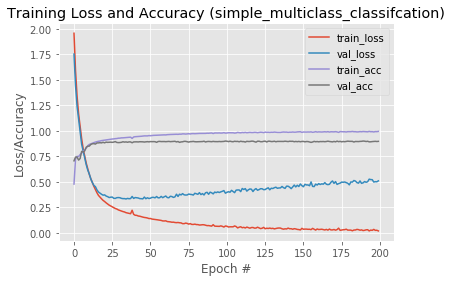

In [38]:
import matplotlib.pyplot as plt
import numpy as np

#evaluate the network
print("[INFO] evaluating network...")
predictions = network.predict(test_images, batch_size=32)

#Uncomment to see the predicted probabilty for each class in every test image
# print ("predictions---------------->",predictions)
#Uncomment to print the predicted labels in each image
# print("predictions.argmax(axis=1)",predictions.argmax(axis=1))

#print the performance report of the prediction
#print(classification_report(testY.argmax(axis=1),
#predictions.argmax(axis=1), target_names=lb.classes_))

# plot the training loss and accuracy for each epoch
N = np.arange(0, 200)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (simple_multiclass_classifcation)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("training_performance.png")

#https://medium.com/@pallawi.ds/ai-starter-train-and-test-your-first-neural-network-classifier-in-keras-from-scratch-b6a5f3b3ebc4

In the end, the merged model behaved similarly to how I would have expected a larger DFF model to behave. To increase accuracy further, I would guess that augumenting the data with and using callbacks to reduce the learning rate could be used. It should also be noted that when running the code a second time the results changed slightly, and the models from Q3 and Q4 came within margin of error of each other. Random initialization of weights make comparing models an inexact science.